In [1]:
from pysph.solver.utils import load
from pysph.solver.utils import iter_output
import h5py

In [2]:
path = "sine_velocity_profile_output/sine_velocity_profile_00000.hdf5"
# data = load(path)

In [3]:
# data = h5py.File(path, 'r')

### Energy Spectrum

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_scalar_energy_spectrum, compute_energy_spectrum # type: ignore

In [5]:
twopi = 2 * np.pi
sin, cos = np.sin, np.cos
sr = 31
_x = np.arange(1/(2*sr), 1., 1. / sr)

#### 1D

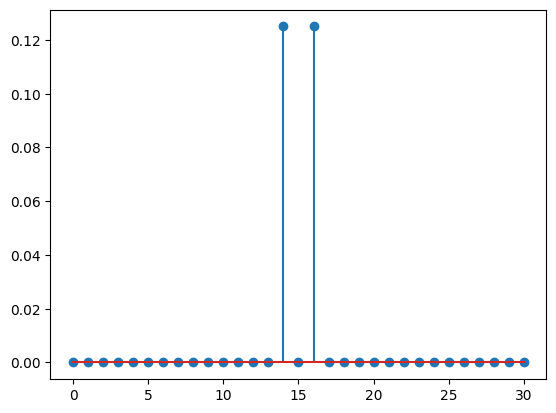

Max (us, vs, ws) = 0.5, 0.0, 0.0
Max (Eu, Ev, Ew) = 0.125, 0.0, 0.0 at [(14,)] || (0.5^2)/2
Max Ek: 0.125 at [1] || (0.125*2)/2 because 2 peaks


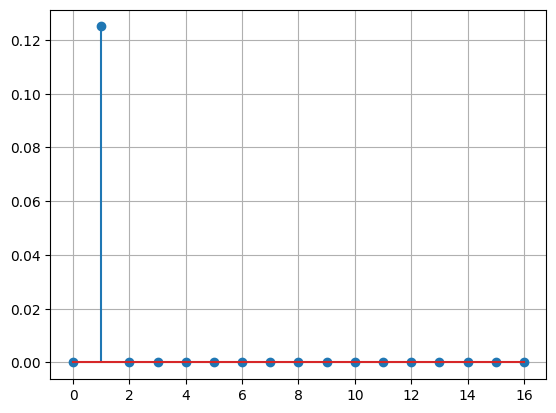

In [6]:
x = _x
u = - cos(twopi * x)
U0 = 1.

# When
EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=None, w=None, U0=U0, debug=True
    )
plt.stem(EK_U);
plt.show()

k, Ek = compute_scalar_energy_spectrum(EK_U)
plt.stem(Ek)
plt.grid()
print(f"Max (us, vs, ws) = {np.max(u_spectrum)}, {np.max(v_spectrum)}, {np.max(w_spectrum)}")
max_idx = np.argmax(EK_U)
max_idx = np.unravel_index(max_idx, EK_U.shape)
print(f"Max (Eu, Ev, Ew) = {np.max(EK_U)}, {np.max(EK_V)}, {np.max(EK_W)} at [{max_idx}] || (0.5^2)/2")
print(f"Max Ek: {np.max(Ek)} at [{np.argmax(Ek)}] || (0.125*2)/2 because 2 peaks")


#### 2D

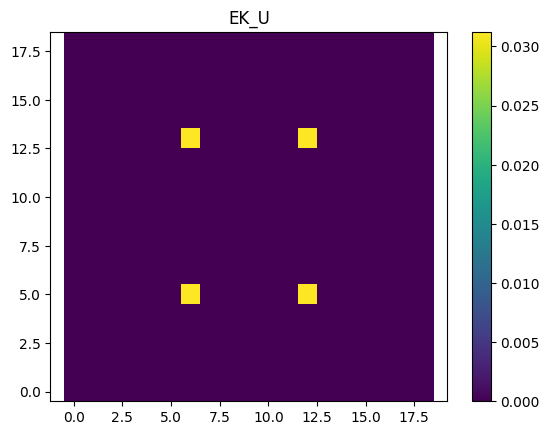

Max (us, vs, ws) = 0.25, 0.24999999999999997, 0.0
Max (Eu, Ev, Ew) = 0.03125, 0.031249999999999993, 0.0 at [(5, 6)] || (0.25^2)/2
Max Ek: 0.0625 at [4] || (0.03125*8)/2 beacuse 8 peaks


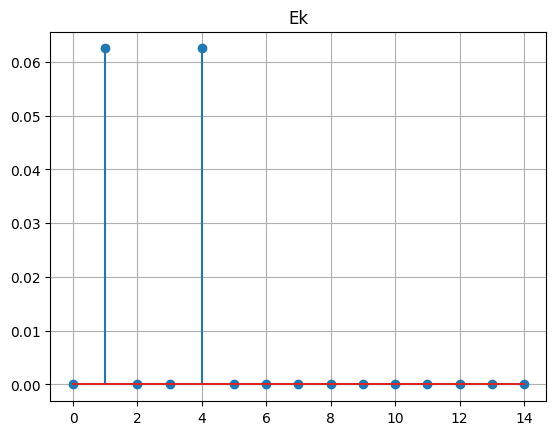

In [19]:
sr = 19
_x = np.arange(1/(2*sr), 1., 1. / sr)
x, y = np.meshgrid(_x, _x)
# u = sin(twopi * x) + sin(2 * twopi * y)
# v = u
u = - cos(3*twopi * x) * sin(4*twopi * y)
v = sin(twopi * x) * cos(twopi * y)
U0 = 1.

# When
EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=v, w=None, U0=U0, debug=True
    )
plt.imshow(EK_U)
plt.colorbar()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.title("EK_U")
plt.show()

k, Ek = compute_scalar_energy_spectrum(EK_U, EK_V, ord=np.inf)
plt.stem(Ek)
plt.grid()
plt.title("Ek")
max_idx = np.argmax(EK_U)
max_idx = np.unravel_index(max_idx, EK_U.shape)
print(f"Max (us, vs, ws) = {np.max(u_spectrum)}, {np.max(v_spectrum)}, {np.max(w_spectrum)}")
print(f"Max (Eu, Ev, Ew) = {np.max(EK_U)}, {np.max(EK_V)}, {np.max(EK_W)} at [{max_idx}] || (0.25^2)/2")
print(f"Max Ek: {np.max(Ek)} at [{np.argmax(Ek)}] || (0.03125*8)/2 beacuse 8 peaks")

#### 3D

Max (us, vs, ws) = 0.125, 0.125, 0.125
Max (Eu, Ev, Ew) = 0.0078125, 0.0078125, 0.0078125 at [(8, 8, 8)] || (0.125^2)/2
Max Ek: 0.09374999999999997 at [2] || (0.0078125*24)/2 because 24 peaks


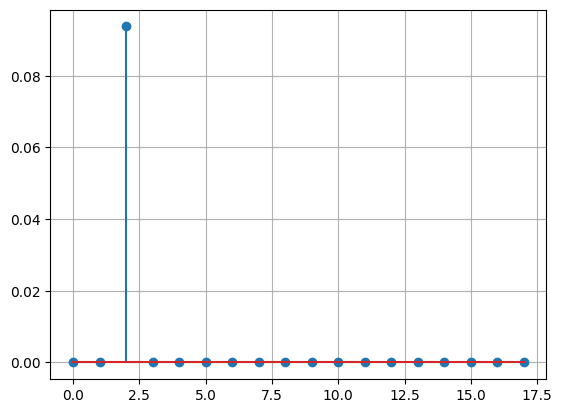

In [16]:
x, y, z = np.meshgrid(_x, _x, _x)
u = - cos(twopi * x) * sin(twopi * y) * sin(twopi * z)
v = sin(twopi * x) * cos(twopi * y) * sin(twopi * z)
w = sin(twopi * x) * sin(twopi * y) * cos(twopi * z)

EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=v, w=w, U0=U0, debug=True
    )

k, Ek = compute_scalar_energy_spectrum(EK_U, EK_V, EK_W, ord=2)
plt.stem(Ek)
plt.grid()
max_idx = np.argmax(EK_U)
max_idx = np.unravel_index(max_idx, EK_U.shape)
print(f"Max (us, vs, ws) = {round(np.max(u_spectrum), 8)}, {round(np.max(v_spectrum), 8)}, {round(np.max(w_spectrum), 8)}")
print(f"Max (Eu, Ev, Ew) = {round(np.max(EK_U), 8)}, {round(np.max(EK_V), 8)}, {round(np.max(EK_W), 8)} at [{max_idx}] || (0.125^2)/2")
print(f"Max Ek: {np.max(Ek)} at [{np.argmax(Ek)}] || (0.0078125*24)/2 because 24 peaks")

### Summary

```
1D
* Max (us, vs, ws) = 0.5, 0.0, 0.0
* Max (Eu, Ev, Ew) = 0.125, 0.0, 0.0 at [(14,)] || (0.5^2)/2
* Max Ek: 0.125 at [1] || (0.125*2)/2 because 2 peaks

2D
* Max (us, vs, ws) = 0.25, 0.25, 0.0
* Max (Eu, Ev, Ew) = 0.03125, 0.03125, 0.0 at [(14, 14)] || (0.25^2)/2
* Max Ek: 0.125 || (0.03125*8)/2 beacuse 8 peaks

3D
* Max (us, vs, ws) = 0.125, 0.625, 0.125
* Max (Eu, Ev, Ew) = 0.0078125, 0.1953125, 0.0078125 at [(14, 14, 14)] || (0.125^2)/2
* Max Ek: 0.84375 || (0.0078125*24)/2 because 24 peaks
```